# 2. Finding faces using OpenCV and Python

In [1]:
!pip install opencv-python
!apt update && apt install -y libsm6 libxext6
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import urllib2
import numpy as np

xmldata = urllib2.urlopen('https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml').read()
file = open('haarcascade_frontalface.xml','w')
file.write(xmldata)
file.close()

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:3 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:5 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,609 B]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Get:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release.gpg [801 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:12 http://archive.ubuntu.com/ubun

In [3]:
ls -l

total 924
-rw-r--r-- 1 root root   2494 Feb 26 10:43 adc.json
-rw-r--r-- 1 root root     12 Feb 26 10:54 example.txt
-rw-r--r-- 1 root root 930127 Feb 26 11:26 haarcascade_frontalface.xml
drwxr-xr-x 1 root root   4096 Feb 19 17:17 sample_data/


In [0]:
def findfaces(fullurltoimage):
  f = urllib2.urlopen(fullurltoimage)
  face_cascade = cv2.CascadeClassifier('haarcascade_frontalface.xml')
  image = np.asarray(bytearray(f.read()), dtype="uint8")
  image = cv2.imdecode(image, cv2.IMREAD_COLOR)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  faces = face_cascade.detectMultiScale(
      gray,
      scaleFactor=1.1,
      minNeighbors=5,
      minSize=(30, 30),
      flags = cv2.CASCADE_SCALE_IMAGE
  )
  print "------> Found {0} faces! <------ ".format(len(faces))

  for (x, y, w, h) in faces:
      cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 5)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  plt.imshow(image,extent=[300,500,0,1],aspect='auto')
  plt.grid(False)
  plt.axis('off')
  plt.show()

------> Found 4 faces! <------ 


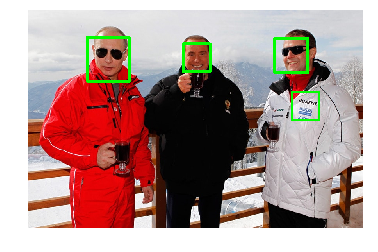

In [5]:
findfaces('http://i.telegraph.co.uk/multimedia/archive/03385/putin-berlusconi-s_3385218k.jpg')

------> Found 3 faces! <------ 


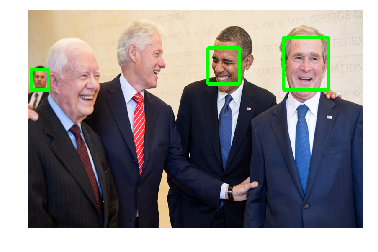

In [6]:
findfaces('https://obamawhitehouse.archives.gov/sites/whitehouse.gov/files/images/1600/Presidents/Four_Presidents.jpg')

------> Found 14 faces! <------ 


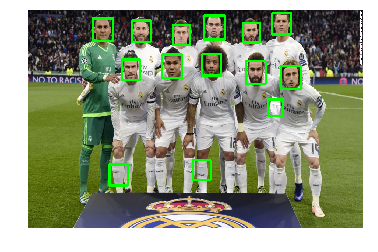

In [7]:
findfaces('http://cdn.cnn.com/cnnnext/dam/assets/160412203255-real-madrid-team-super-169.jpg')

In [0]:
findfaces('http://epilepsyu.com/wp-content/uploads/2014/01/happy-people-1050x600.jpg')

------> Found 1 faces! <------ 


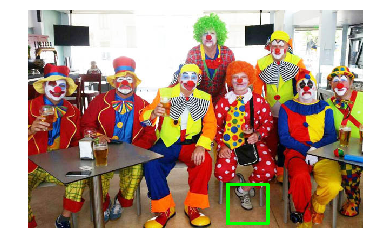

In [9]:
findfaces('https://cdn.images.dailystar.co.uk/dynamic/1/photos/671000/620x/clowns-555886.jpg')

------> Found 5 faces! <------ 


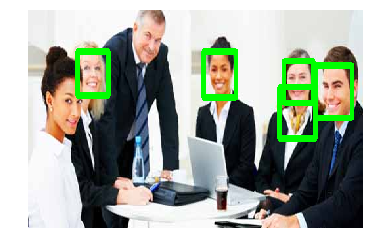

In [10]:
findfaces('http://www.brefigroup.co.uk/images/new/development_and_training_510.jpg')

------> Found 8 faces! <------ 


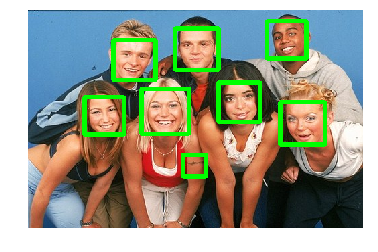

In [11]:
findfaces('https://pbs.twimg.com/profile_images/1599701422/rm.jpg')